In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path


# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils import plot_model


In [ ]:
df_multi=pd.read_csv(r'/content/KDDTrain+.txt')
df_binary=pd.read_csv(r'/content/KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df_multi.columns=columns
df_binary.columns=columns


In [ ]:
df_binary["attack"] = np.where(df_binary["attack"] != "normal", 'malicious','normal')

In [ ]:
attack_categories = {
    'normal': 'normal',
    'neptune': 'DoS',
    'warezclient': 'Unauthorized Access',
    'ipsweep': 'Port Scanning',
    'portsweep': 'Port Scanning',
    'teardrop': 'DoS',
    'nmap': 'Port Scanning',
    'satan': 'Port Scanning',
    'smurf': 'DoS',
    'pod': 'DoS',
    'back': 'Unauthorized Access',
    'guess_passwd': 'Unauthorized Access',
    'ftp_write': 'Unauthorized Access',
    'multihop': 'Unauthorized Access',
    'rootkit': 'Malware',
    'buffer_overflow': 'DoS',
    'imap': 'Unauthorized Access',
    'warezmaster': 'Unauthorized Access',
    'phf': 'Unauthorized Access',
    'land': 'DoS',
    'loadmodule': 'Malware',
    'spy': 'Unauthorized Access',
    'perl': 'Malware'
}


# Categorize attacks based on the dictionary mapping
df_multi['attack']= df_multi["attack"].map(attack_categories)

In [ ]:
df_multi.attack.value_counts()

normal                 67342
DoS                    45001
Port Scanning          11656
Unauthorized Access     1951
Malware                   22
Name: attack, dtype: int64

In [ ]:
df_multi.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21


In [ ]:
df_binary.attack.value_counts()

normal       67342
malicious    58630
Name: attack, dtype: int64

In [ ]:
# Binary Classification

In [ ]:
attack_frame=pd.DataFrame(df_binary.attack)

In [ ]:
attack_frame.value_counts()

attack   
normal       67342
malicious    58630
dtype: int64

In [ ]:
le=preprocessing.LabelEncoder()
enc_label=attack_frame.apply(le.fit_transform)
df_binary['intrusion']=enc_label

In [ ]:
df_binary

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,intrusion
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,malicious,19,0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,malicious,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,malicious,20,0
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,1
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,1
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,malicious,20,0


In [ ]:
df_binary.drop(labels=['attack'],axis=1,inplace=True)

In [ ]:
df_binary= pd.get_dummies(df_binary,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")


In [ ]:

y_train_multi= df_binary[['intrusion']]
X_train_multi= df_binary.drop(labels=['intrusion'], axis=1)



In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_train_multi = LabelBinarizer().fit_transform(y_train_multi)

In [ ]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.30, random_state=42)


In [ ]:
X_train.shape

(88180, 123)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(88180, 123, 1)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(37792, 123, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout, Dense

model = Sequential()

# Input layer and first Conv1D layer
model.add(tf.keras.layers.Reshape((123, 1)))
model.add(Conv1D(32, 2, padding="same", input_shape=(X_train.shape[1], 1), activation='sigmoid'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))

# Additional Conv1D layer
model.add(Conv1D(32, 2, padding="same", activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))

# LSTM layer
model.add(LSTM(32, return_sequences=True))  # Adjust the number of LSTM units as needed
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())
model.add(Dropout(0.2))

# Output layer with sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with your choice of optimizer, loss, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 15s 95ms/step - loss: 0.6942 - accuracy: 0.5258 - val_loss: 0.6765 - val_accuracy: 0.5356
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 0.6801 - accuracy: 0.5667 - val_loss: 0.6481 - val_accuracy: 0.5356
Epoch 3/100
15/15 [==============================] - 0s 25ms/step - loss: 0.6483 - accuracy: 0.6433 - val_loss: 0.5379 - val_accuracy: 0.8884
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5453 - accuracy: 0.7372 - val_loss: 0.2822 - val_accuracy: 0.8978
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 0.4326 - accuracy: 0.8106 - val_loss: 0.2398 - val_accuracy: 0.9047
Epoch 6/100
15/15 [==============================] - 0s 26ms/step - loss: 0.3594 - accuracy: 0.8572 - val_loss: 0.2286 - val_accuracy: 0.9034
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.3137 - accuracy: 0.8802 - val_loss: 0.2150 - val_accuracy: 0.9072
Epoch

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1181/1181 [==============================] - 4s 3ms/step - loss: 0.0837 - accuracy: 0.9731
Test results - Loss: 0.08374793827533722 - Accuracy: 97.31159806251526%


In [ ]:
# Save the model to a file
model.save("Binary_Model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Multiclass Classification

In [ ]:
attack_frame=pd.DataFrame(df_multi.attack)

In [ ]:
attack_frame.value_counts()

attack             
normal                 67342
DoS                    45001
Port Scanning          11656
Unauthorized Access     1951
Malware                   22
dtype: int64

In [ ]:
le=preprocessing.LabelEncoder()
enc_label=attack_frame.apply(le.fit_transform)
df_multi['intrusion']=enc_label

In [ ]:
df_multi.drop(labels= [ 'attack'], axis=1, inplace=True)


In [ ]:
df_multi= pd.get_dummies(df_multi,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")


In [ ]:

y_train_multi= df_multi[['intrusion']]
X_train_multi= df_multi.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125972, 123) 
y_train has shape: (125972, 1)


In [ ]:

from sklearn.preprocessing import LabelBinarizer
y_train_multi = LabelBinarizer().fit_transform(y_train_multi)


In [ ]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.30, random_state=42)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(88180, 123, 1)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(37792, 123, 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dropout, Dense, Reshape

model2 = Sequential()

# Reshape layer for your data
model2.add(Reshape((123, 1), input_shape=(123,1)))

# First Conv1D layer
model2.add(Conv1D(32, 2, padding="same", activation='sigmoid'))
model2.add(MaxPooling1D(pool_size=4))
model2.add(Dropout(0.2))

# Additional Conv1D layer
model2.add(Conv1D(32, 2, padding="same", activation='relu'))
model2.add(MaxPooling1D(pool_size=4))
model2.add(Dropout(0.2))

# LSTM layer
model2.add(LSTM(32, return_sequences=True))  # Adjust the number of LSTM units as needed
model2.add(Dropout(0.2))

# Flatten layer
model2.add(Flatten())
model2.add(Dropout(0.2))

# Output layer with softmax activation for multiclass
model2.add(Dense(units=5, activation='softmax'))  # 5 classes in this case

# Compile the model with categorical_crossentropy loss
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 5s 66ms/step - loss: 1.3090 - accuracy: 0.4736 - val_loss: 1.0608 - val_accuracy: 0.5356
Epoch 2/100
15/15 [==============================] - 0s 27ms/step - loss: 1.0492 - accuracy: 0.5045 - val_loss: 0.9850 - val_accuracy: 0.5356
Epoch 3/100
15/15 [==============================] - 0s 26ms/step - loss: 1.0198 - accuracy: 0.5142 - val_loss: 0.9702 - val_accuracy: 0.5356
Epoch 4/100
15/15 [==============================] - 0s 27ms/step - loss: 1.0031 - accuracy: 0.5241 - val_loss: 0.9617 - val_accuracy: 0.5356
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.9858 - accuracy: 0.5412 - val_loss: 0.9249 - val_accuracy: 0.5356
Epoch 6/100
15/15 [==============================] - 0s 27ms/step - loss: 0.9530 - accuracy: 0.5741 - val_loss: 0.8442 - val_accuracy: 0.8594
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.8732 - accuracy: 0.6656 - val_loss: 0.6566 - val_accuracy: 0.8408
Epoch 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Extract the features from the ConvLSTM model
X_train_features = model2.predict(X_train)
X_test_features = model2.predict(X_test)

# Define the random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the random forest classifier
clf.fit(X_train_features, y_train)

# Evaluate the random forest classifier on the test set
y_pred = clf.predict(X_test_features)
accuracy = clf.score(X_test_features, y_test)

print('Accuracy for RF:', accuracy)

1181/1181 [==============================] - 3s 3ms/step
Accuracy for RF: 0.9947343353090601


In [ ]:
# Save the model to a file
model2.save("MultiClassification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 0s 4ms/step


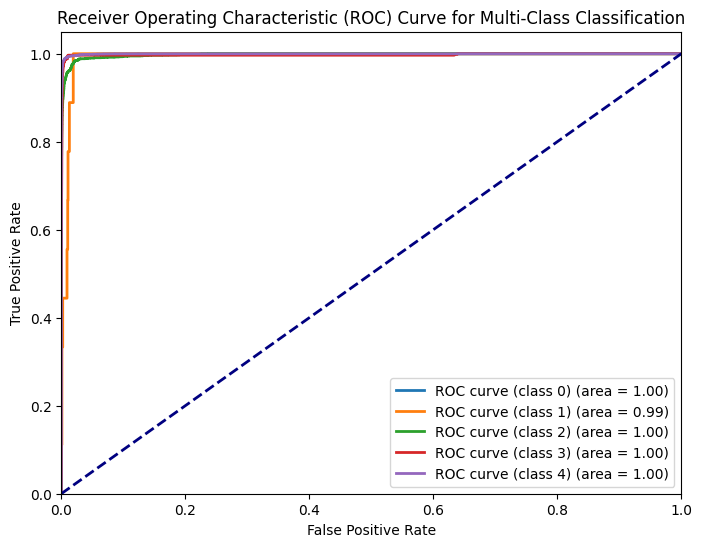

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have a multi-label classification model and predictions
y_prob = model2.predict(X_test,batch_size=1000)  # Replace X_test with your test data

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_prob.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()
